In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
imgs = pd.read_csv('isomap.csv', header=None)
imgs.shape

(4096, 698)

In [13]:
X = imgs.values.T

dists = cdist(X, X, 'euclidean')
def get_a_matrix(a):
    idx = a.argsort().argsort()
    idx = np.array([1 if x <=100 and x>0 else 0 for x in idx]).reshape(idx.shape)
    return idx
def get_w_matrix(a):
    idx = a.argsort().argsort()
    idx = np.array([x if x <= 100 else 110 for x in idx]).reshape(idx.shape)
    return idx

A = np.apply_along_axis(get_a_matrix, 1, dists)
W = np.apply_along_axis(get_w_matrix, 1, dists)


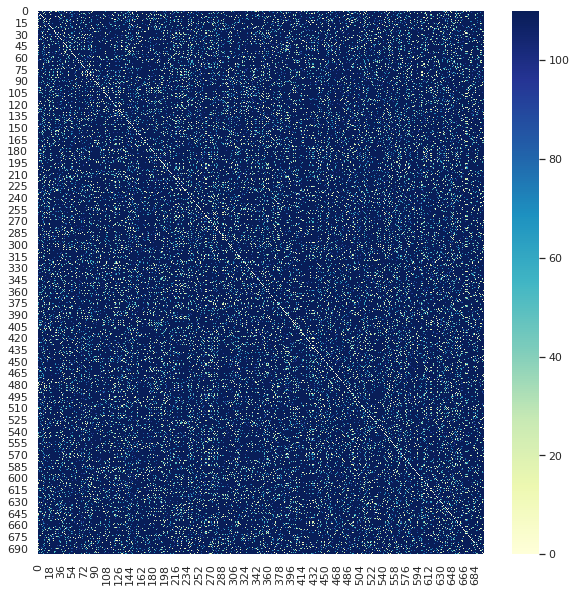

In [17]:
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(W,cmap="YlGnBu")

In [12]:
W.max()

100

In [208]:
import numpy as np
import networkx as nx


def Matrix_D(W):
    # Generate Graph and Obtain Matrix D, \\
    # from weight matrix W defining the weight on the edge between each pair of nodes.
    # Note that you can assign sufficiently large weights to non-existing edges.
    
    # Package networkx (version 1.11) is required

    n = np.shape(W)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(W[i,j], W[j,i]))])

    res = nx.all_pairs_dijkstra_path_length(Graph)
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = res[i][j]
    np.savetxt('D.csv', D)
    return D


In [209]:
D = Matrix_D(W)

In [210]:
D

array([[ 0., 22.,  2., ..., 33., 21., 13.],
       [22.,  0., 23., ..., 13., 11., 21.],
       [ 2., 23.,  0., ..., 35., 22., 11.],
       ...,
       [33., 13., 35., ...,  0., 24., 33.],
       [21., 11., 22., ..., 24.,  0., 16.],
       [13., 21., 11., ..., 33., 16.,  0.]])

In [135]:
from sklearn.preprocessing import KernelCenterer
m,_ = D.shape
I = np.identity(m)
ones = np.ones(D.shape)
H = I - (ones * 1/m)
C = np.dot(np.dot(H,D*D),H) * -1/(2*-10000000)
#C2 = KernelCenterer().fit_transform(D)
vals, vecs = np.linalg.eig(C)
pc_vals = vals[vals.argsort()[::-1]]
pcs = vecs[vals.argsort()[::-1]]

In [136]:
%matplotlib inline
Zt = np.dot(pcs[:,:2],np.diag(pc_vals[:2]**(-.5)))
d = pd.DataFrame(Zt)

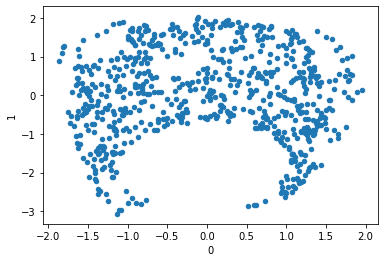

In [137]:
d.plot.scatter(x=0,y=1)

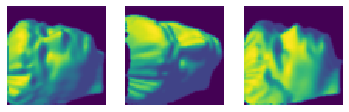

In [182]:
Zt_dists = cdist(Zt, Zt, 'euclidean')
W_Zt = np.apply_along_axis(get_w_matrix, 1, Zt_dists)

row = 2
start = 5
end = start + 3

close = W_Zt[start].argsort().argsort()[start:end]



plt.subplot(1, 3, 1)
plt.imshow(X[close[0],:].reshape(64,64))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(X[close[1],:].reshape(64,64))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(X[close[2],:].reshape(64,64))
plt.axis("off")

plt.show()


In [185]:
image_list = []
start = 5
end = start + 5
for i in range(X.shape[0]):
    row = []
    closest = W_Zt[i].argsort().argsort()[start:end]
    for j in range(len(closest)):
        row.append(X[closest[j],:].reshape(64,64))
    image_list.append(row)

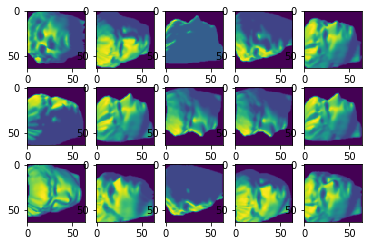

In [192]:
s,e = (57,60)

f, axarr = plt.subplots(e-s,5)
for i,val in enumerate(image_list[s:e]):
    for j,v in enumerate(val):
        axarr[i,j].imshow(v)
        

In [ ]:
for i in range(-3,3):
    

In [259]:
df = pd.DataFrame(Zt, columns = ['x','y'])

image_list = []
for i in np.linspace(-3,3,15):
    d = df[(df['y']<i) & (df['y']>i-1)]
    idx = d[d['x'] == d.min()['x']].index[0]
    image_list.append(X[idx].reshape(64,64))

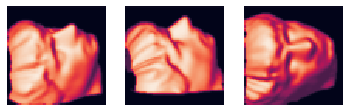

In [260]:
plt.subplot(1, 3, 1)
plt.imshow(image_list[9])
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_list[10])
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_list[13])
plt.axis("off")


plt.show()